AML assignment to complete before Thursday lab

In today's AML class, entire optimization cycle for ML was covered for vectorized Linear regression  
a. Definition and evaluation of Loss function  
b. Calculation of gradient  
c. gradient descent

A notebook with non vectorized implementation was provided to you earlier. Your assignnment is to   
a. Create vectorized versions of the functions  
b. Run them on a real dataset. Plot the Epoch/iteration versus Loss curve   
c. Compare the time taken and model performance with R2 score with sklearn.linear_models.LinearRegression  


In [7]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    losses = []

    for _ in range(iterations):
        y_pred = X.dot(theta)
        gradient = (1 / m) * X.T.dot(y_pred - y)
        theta -= learning_rate * gradient

        # Calculate and store the loss
        loss = mean_squared_error(y, X.dot(theta))
        losses.append(loss)

    return theta, losses


In [16]:
dfUber.head()
dfUber.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

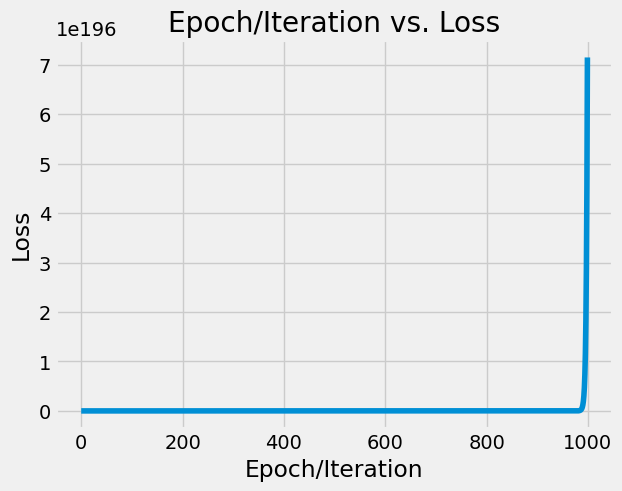

In [17]:
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dfUber = pd.read_csv('D://AML//Linerar_Regression//uber.csv')
X, y = dfUber.fare_amount, dfUber.passenger_count
X = np.c_[np.ones(X.shape[0]), X]  # Add a bias term (intercept)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize theta and hyperparameters
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 1000

# Run gradient descent and collect losses
theta, losses = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Plot the loss curve
plt.plot(range(iterations), losses)
plt.xlabel('Epoch/Iteration')
plt.ylabel('Loss')
plt.title('Epoch/Iteration vs. Loss')
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

# Train a LinearRegression model
start_time = time.time()
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
sklearn_pred = sklearn_model.predict(X_test)
sklearn_time = time.time() - start_time

# Calculate R^2 score
sklearn_r2 = r2_score(y_test, sklearn_pred)

# Print results
print("Time taken by sklearn LinearRegression: {:.4f} seconds".format(sklearn_time))
print("R^2 score using sklearn LinearRegression: {:.4f}".format(sklearn_r2))


Time taken by sklearn LinearRegression: 0.0382 seconds
R^2 score using sklearn LinearRegression: 0.0002


In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
import pandas as pd
dfSalary = pd.read_csv('D://AML//Linerar_Regression//Salary_dataset.csv')
dfSalary.head(30)
dfSalary.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [12]:
X, y = dfUber.YearsExperience, dfUber.Salary
df = pd.DataFrame({ "x": X.tolist(), "y": y.tolist()})
df.head()

,x,y
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0, 0.5, 'y')

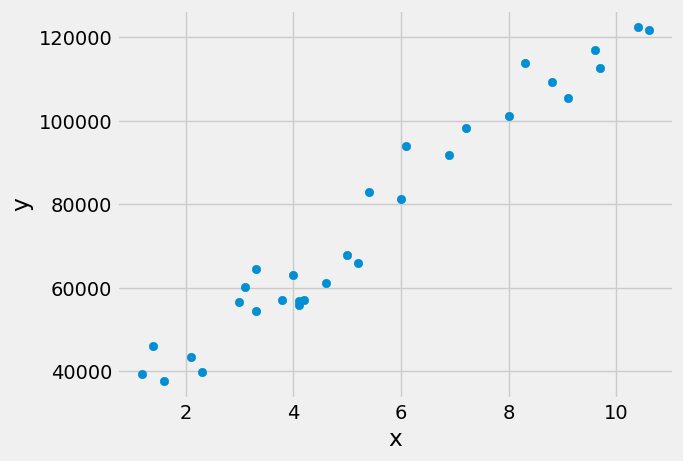

In [13]:
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')

In [14]:
# Shuffles the indices
N = 29
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]

# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

### 2. Random intialization and initial fit

In [19]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


In [20]:
yhat = b + w * X_train

### 3. Objective/Lost/Cost Function

$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}^{(i)}}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y}^{(i)} - y^{(i)})}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x^{(i)} - y^{(i)})}^2
\end{aligned}
$$

In [25]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

6518168982.226271
